In [254]:
!pip install kagglehub

## **Load Dataset**

### 📄 Documentation

| Column            | Type       | Description                                                                 |
|-------------------|------------|-----------------------------------------------------------------------------|
| `Age`             | Numeric    | Patient's age in years. Older age increases CKD risk.                      |
| `Creatinine_Level`| Numeric    | Blood creatinine level (mg/dL), a key kidney function marker.              |
| `BUN`             | Numeric    | Blood Urea Nitrogen level (mg/dL). Elevated BUN may indicate CKD.          |
| `Diabetes`        | Categorical| 1 if patient has diabetes, else 0. Diabetes is a major CKD risk factor.    |
| `Hypertension`    | Categorical| 1 if patient has high blood pressure, else 0. Often linked to kidney issues.|
| `GFR`             | Numeric    | Glomerular Filtration Rate (ml/min/1.73m²), the best measure of kidney function. |
| `Urine_Output`    | Numeric    | Urine produced in ml/day. Low output may indicate kidney dysfunction.      |
| `CKD_Status`      | Target     | 1 if patient has chronic kidney disease, else 0.                           |
| `Dialysis_Needed` | Target (0/1) | 1 if patient will require dialysis based on disease progression, else 0. |


In [255]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
# Set the path to the file you'd like to load
file_path = "kidney_disease_dataset.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "miadul/kidney-disease-risk-dataset",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)


df.head()

/tmp/ipykernel_68094/2246716198.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


,Age,Creatinine_Level,BUN,Diabetes,Hypertension,GFR,Urine_Output,CKD_Status,Dialysis_Needed
0,71,0.30,40.9,0,1,46.8,1622.0,1,0
1,34,1.79,17.1,0,0,43.8,1428.0,1,0
2,80,2.67,15.0,0,1,78.2,1015.0,1,0
3,40,0.97,31.1,0,1,92.8,1276.0,1,0
4,43,2.05,22.8,1,1,62.2,1154.0,0,0


In [256]:


df.duplicated().sum()

df = df.rename(columns={
    'Age': 'idade',
    'Creatinine_Level': 'creatinina_sanguinea',
    'BUN': 'ureia_sanguinea',
    'Diabetes': 'diabetes',
    'Hypertension': 'hipertensao',
    'GFR': 'taxa_filtracao_glomerular',
    'Urine_Output': 'producao_urina',
    'CKD_Status': 'doenca_renal_cronica',
    'Dialysis_Needed': 'precisa_dialise'
})

features = ['idade', 'creatinina_sanguinea', 'ureia_sanguinea', 'diabetes', 'hipertensao','taxa_filtracao_glomerular',
            'producao_urina']
target = ['doenca_renal_cronica']

X = df[features]
y = df[target]

In [257]:
X

,idade,creatinina_sanguinea,ureia_sanguinea,diabetes,hipertensao,taxa_filtracao_glomerular,producao_urina
0,71,0.30,40.9,0,1,46.8,1622.0
1,34,1.79,17.1,0,0,43.8,1428.0
2,80,2.67,15.0,0,1,78.2,1015.0
3,40,0.97,31.1,0,1,92.8,1276.0
4,43,2.05,22.8,1,1,62.2,1154.0
...,...,...,...,...,...,...,...
2299,89,1.11,5.0,1,0,55.1,1344.0
2300,89,0.30,5.0,0,0,47.5,2156.0
2301,84,0.30,7.3,1,0,120.0,1353.0
2302,24,1.58,26.4,1,0,75.6,1067.0


In [258]:
y

,doenca_renal_cronica
0,1
1,1
2,1
3,1
4,0
...,...
2299,1
2300,1
2301,0
2302,0


### **Analyse distribution target**
It is essential to verify the distribution of the target variable, as an imbalanced distribution can lead to biased predictions and reduced model performance.

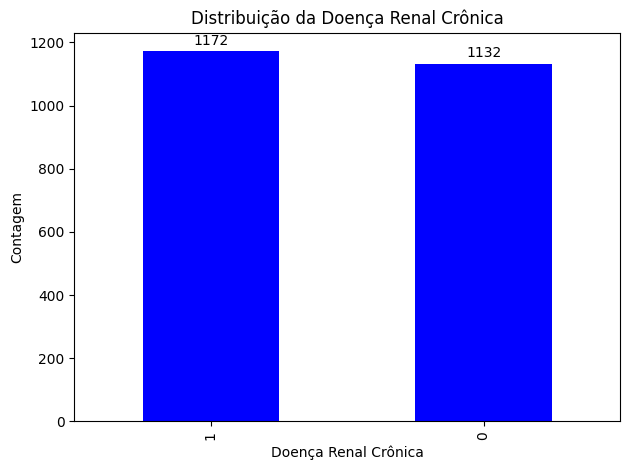

In [259]:
import matplotlib.pyplot as plt


contagem = df['doenca_renal_cronica'].value_counts()
ax = contagem.plot(kind='bar', color='blue')
plt.Figure(figsize=[8,4])
plt.xlabel('Doença Renal Crônica')
plt.ylabel('Contagem')
plt.title('Distribuição da Doença Renal Crônica')

for i, v in enumerate(contagem):
    ax.text(i, v + (v * 0.01), str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


### **Normalize features**
Since the feature values vary in scale, normalization is required to ensure that all features contribute equally to the model.

In [260]:
from sklearn.preprocessing import MinMaxScaler
import joblib

normalize = MinMaxScaler()
normalize.fit(X)
X_normalizado = normalize.transform(X)
joblib.dump(normalize, '../models/scaler_patient_renal.pkl')

['../models/scaler_patient_renal.pkl']

In [261]:
X_normalizado = pd.DataFrame(X_normalizado, columns = X.columns, index=X.index)

In [262]:
X = X_normalizado
X

,idade,creatinina_sanguinea,ureia_sanguinea,diabetes,hipertensao,taxa_filtracao_glomerular,producao_urina
0,0.728571,0.000000,0.630931,0.0,1.0,0.363478,0.543766
1,0.200000,0.389034,0.212654,0.0,0.0,0.337391,0.474455
2,0.857143,0.618799,0.175747,0.0,1.0,0.636522,0.326902
3,0.285714,0.174935,0.458699,0.0,1.0,0.763478,0.420150
4,0.328571,0.456919,0.312830,1.0,1.0,0.497391,0.376563
...,...,...,...,...,...,...,...
2299,0.985714,0.211488,0.000000,1.0,0.0,0.435652,0.444444
2300,0.985714,0.000000,0.000000,0.0,0.0,0.369565,0.734548
2301,0.914286,0.000000,0.040422,1.0,0.0,1.000000,0.447660
2302,0.057143,0.334204,0.376098,1.0,0.0,0.613913,0.345481


## Train e Test
Separate data of train and test for create model modelression logistic.

In [263]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
cross_model = LogisticRegression()
scores = cross_val_score(cross_model, X, y, cv=5, scoring='accuracy')


print("Acurácias por fold:", scores)
print("Acurácia média:", scores.mean())


/home/geronimo/Documentos/Projetos-Python/data_scientist/PacienteRenal/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/geronimo/Documentos/Projetos-Python/data_scientist/PacienteRenal/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/geronimo/Documentos/Projetos-Python/data_scientist/PacienteRenal/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/geronim

Acurácias por fold: [0.84598698 0.83947939 0.82212581 0.84598698 0.82173913]
Acurácia média: 0.8350636612279544


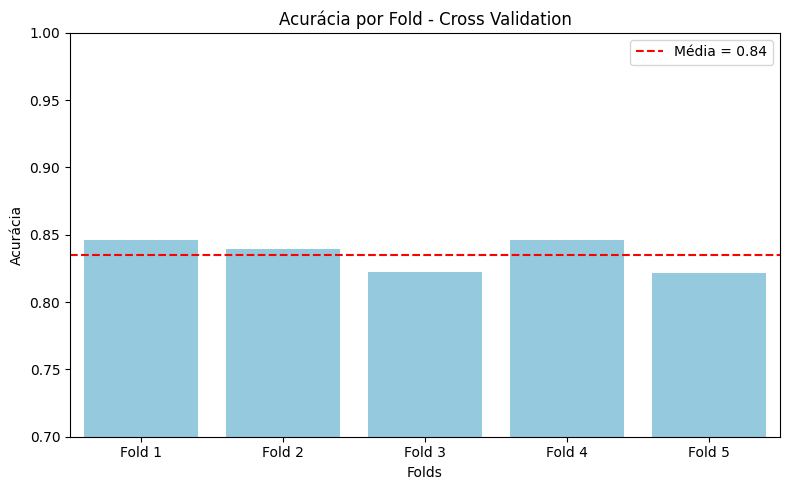

In [264]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotando as acurácias por fold
plt.figure(figsize=(8, 5))
sns.barplot(x=[f'Fold {i+1}' for i in range(len(scores))], y=scores, color='skyblue')

plt.ylim(0.7, 1.0)  # Ajuste conforme seus dados
plt.title('Acurácia por Fold - Cross Validation')
plt.ylabel('Acurácia')
plt.xlabel('Folds')
plt.axhline(scores.mean(), color='red', linestyle='--', label=f'Média = {scores.mean():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

In [265]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [266]:
X_train

,idade,creatinina_sanguinea,ureia_sanguinea,diabetes,hipertensao,taxa_filtracao_glomerular,producao_urina
650,0.785714,0.193211,0.340949,0.0,1.0,0.340870,0.350125
2198,0.271429,0.360313,0.267135,0.0,0.0,0.466087,0.369418
1314,0.228571,0.433420,0.625659,0.0,1.0,0.645217,0.248660
360,0.214286,0.010444,0.298770,0.0,0.0,0.282609,0.207931
974,0.885714,0.054830,0.000000,1.0,1.0,0.738261,0.412647
...,...,...,...,...,...,...,...
1638,0.900000,0.383812,0.123023,0.0,1.0,0.837391,0.000000
1095,0.871429,0.219321,0.033392,0.0,1.0,0.527826,0.456234
1130,0.357143,0.616188,0.077329,0.0,1.0,0.268696,0.411576
1294,0.085714,0.691906,0.500879,0.0,0.0,0.607826,0.656306


### **Training Model Logistic Regression**

In [267]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] 

/home/geronimo/Documentos/Projetos-Python/data_scientist/PacienteRenal/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [268]:
from sklearn import metrics

acc_reg = metrics.accuracy_score(y_test, y_pred)
precision_reg = metrics.precision_score(y_test, y_pred)
recall_reg = metrics.recall_score(y_test, y_pred)
roc_reg = metrics.roc_curve(y_test, y_pred_proba)
roc_auc_reg = metrics.roc_auc_score(y_test, y_pred_proba)
print(f'Acurácia: {100 * acc_reg:.2f} \n'
      f'Precisão : {100 * precision_reg:.2f} \n'
      f'Recall : {100 * recall_reg:.2f}')


Acurácia: 84.16 
Precisão : 83.19 
Recall : 85.02


Text(0, 0.5, 'Recall')

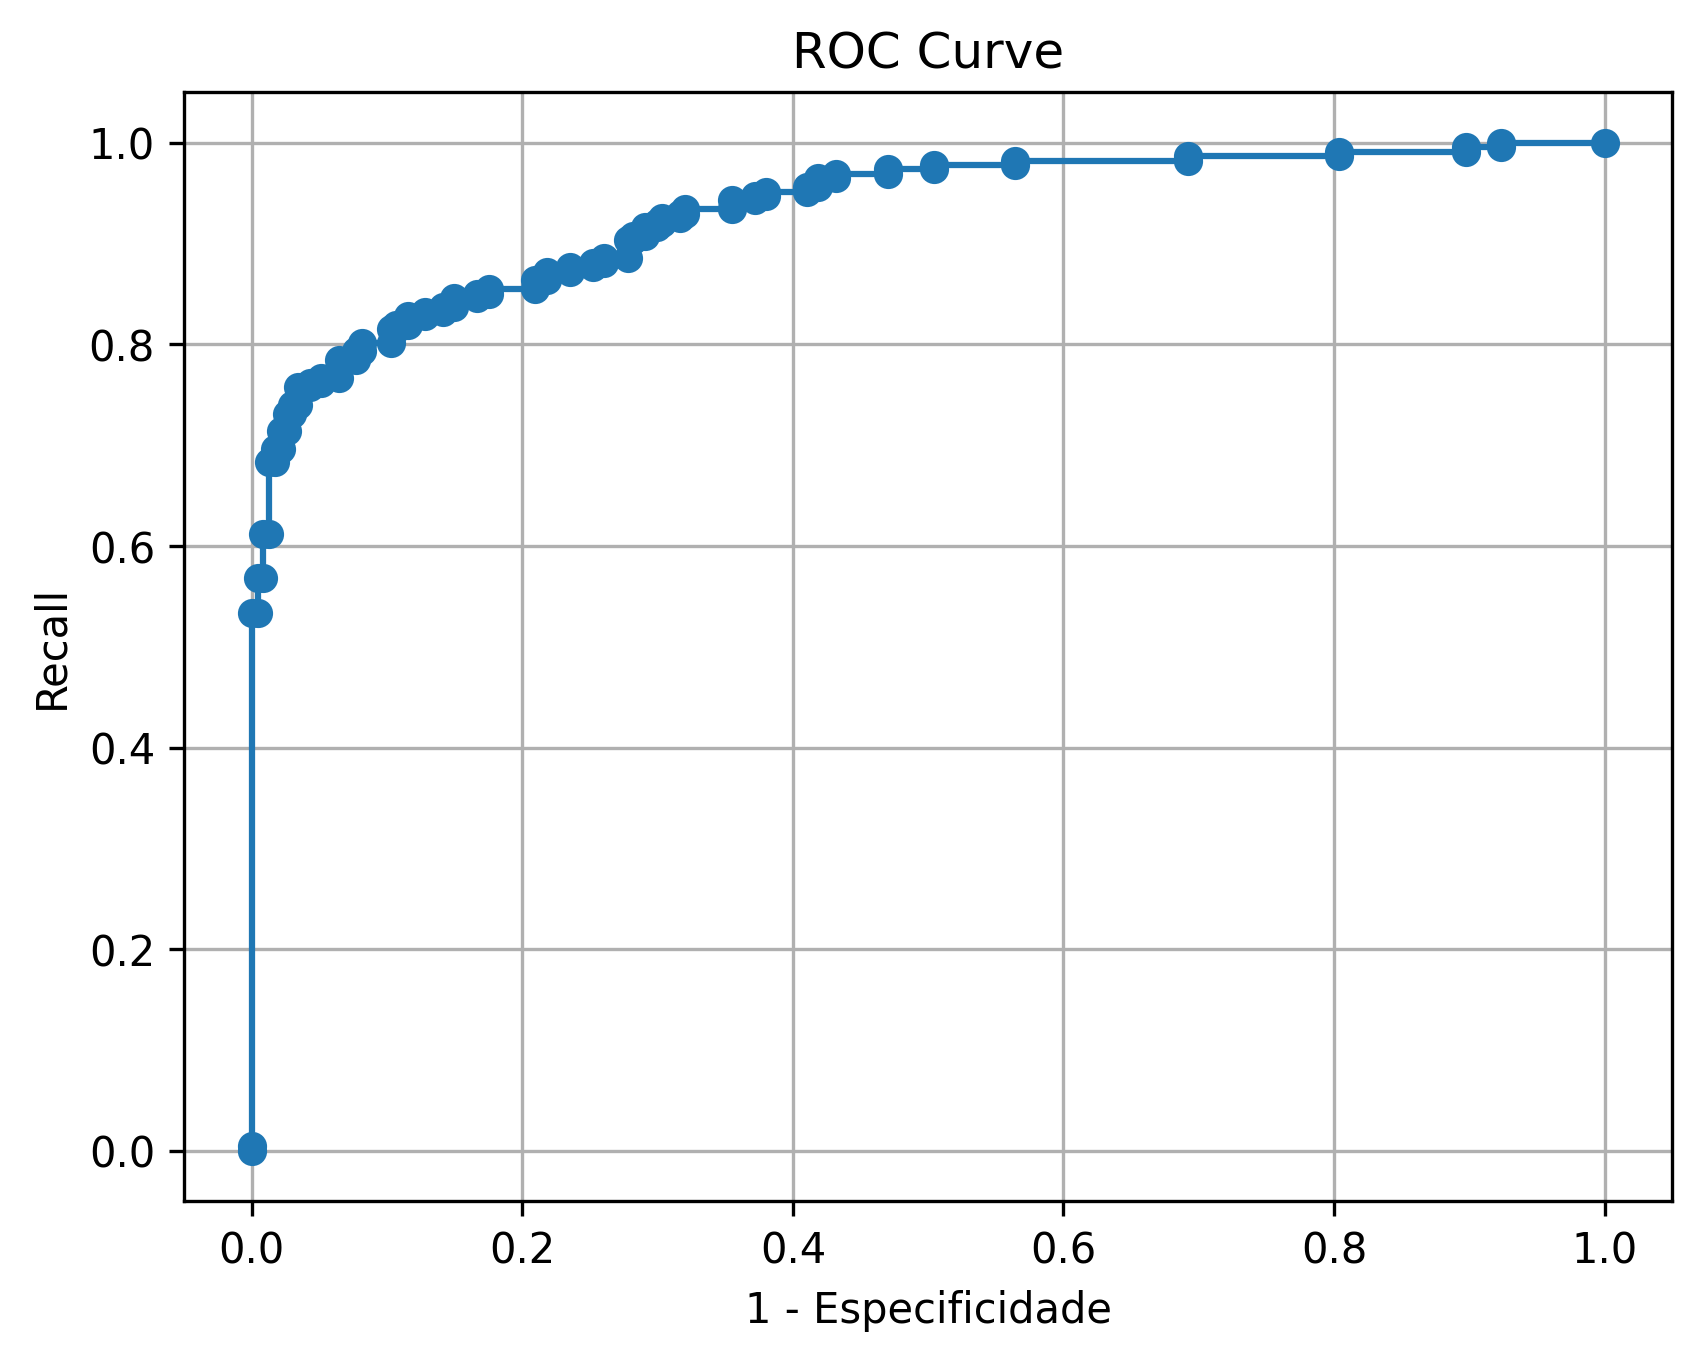

In [269]:
plt.figure(dpi=300)
plt.plot(roc_reg[0], roc_reg[1], 'o-')
plt.grid(True)
plt.title('ROC Curve')
plt.xlabel('1 - Especificidade')
plt.ylabel('Recall')

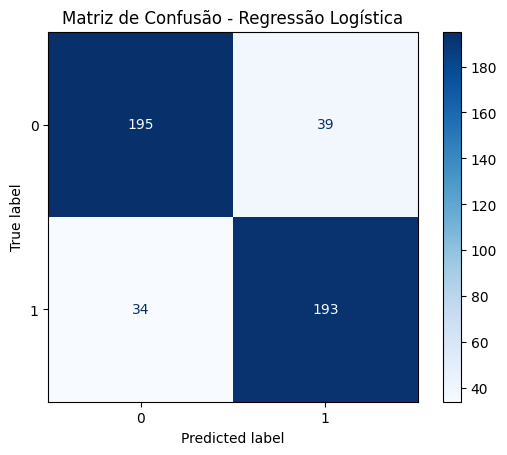

In [270]:
# Matriz de confusão
cm = metrics.confusion_matrix(y_test, y_pred)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d') 

plt.title("Matriz de Confusão - Regressão Logística")
plt.grid(False)
plt.show()


# **Overfiting on Decision Tree**

### **Cross Validation**
Evaluation to find out how the evaluation is going in cross-validation divisions

In [271]:
from sklearn import tree

model2 = tree.DecisionTreeClassifier()
model2.fit(X,y)
scores_decision_tree = cross_val_score(model2, X, y, cv=5, scoring='accuracy')

print("Acurácias por fold:", scores_decision_tree)
print("Acurácia média:", scores_decision_tree.mean())

Acurácias por fold: [1.         1.         1.         1.         0.99782609]
Acurácia média: 0.9995652173913043


Although the result has very high numbers, this indicates total overfitting, that is, it is learning too much and for the next data insertion this can be a big problem and the model will not behave as it should.

### **GridSearch**
Using a degree-wise search to find the best parameters for decision making to avoid overfitting

In [272]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {'min_samples_leaf': [1, 5, 10]}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Melhor valor:", grid.best_params_)


Melhor valor: {'min_samples_leaf': 1}


### **Training Model Decision Tree**

In [273]:
from sklearn import tree

decision_tree_model = tree.DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)
y_proba_tree = decision_tree_model.predict_proba(X_test)[:, 1] 

In [274]:
from sklearn import metrics
from sklearn.tree import plot_tree
acc_tree = metrics.accuracy_score(y_test, y_pred_tree)
precision_tree = metrics.precision_score(y_test, y_pred_tree)
recall_tree = metrics.recall_score(y_test, y_pred_tree)
roc_tree = metrics.roc_curve(y_test, y_proba_tree)
roc_auc_tree = metrics.roc_auc_score(y_test, y_proba_tree)
print(f'Acurácia: {100 * acc_tree:.2f} \n'
      f'Precisão : {100 * precision_tree:.2f} \n'
      f'Recall : {100 * recall_tree:.2f}')

Acurácia: 100.00 
Precisão : 100.00 
Recall : 100.00


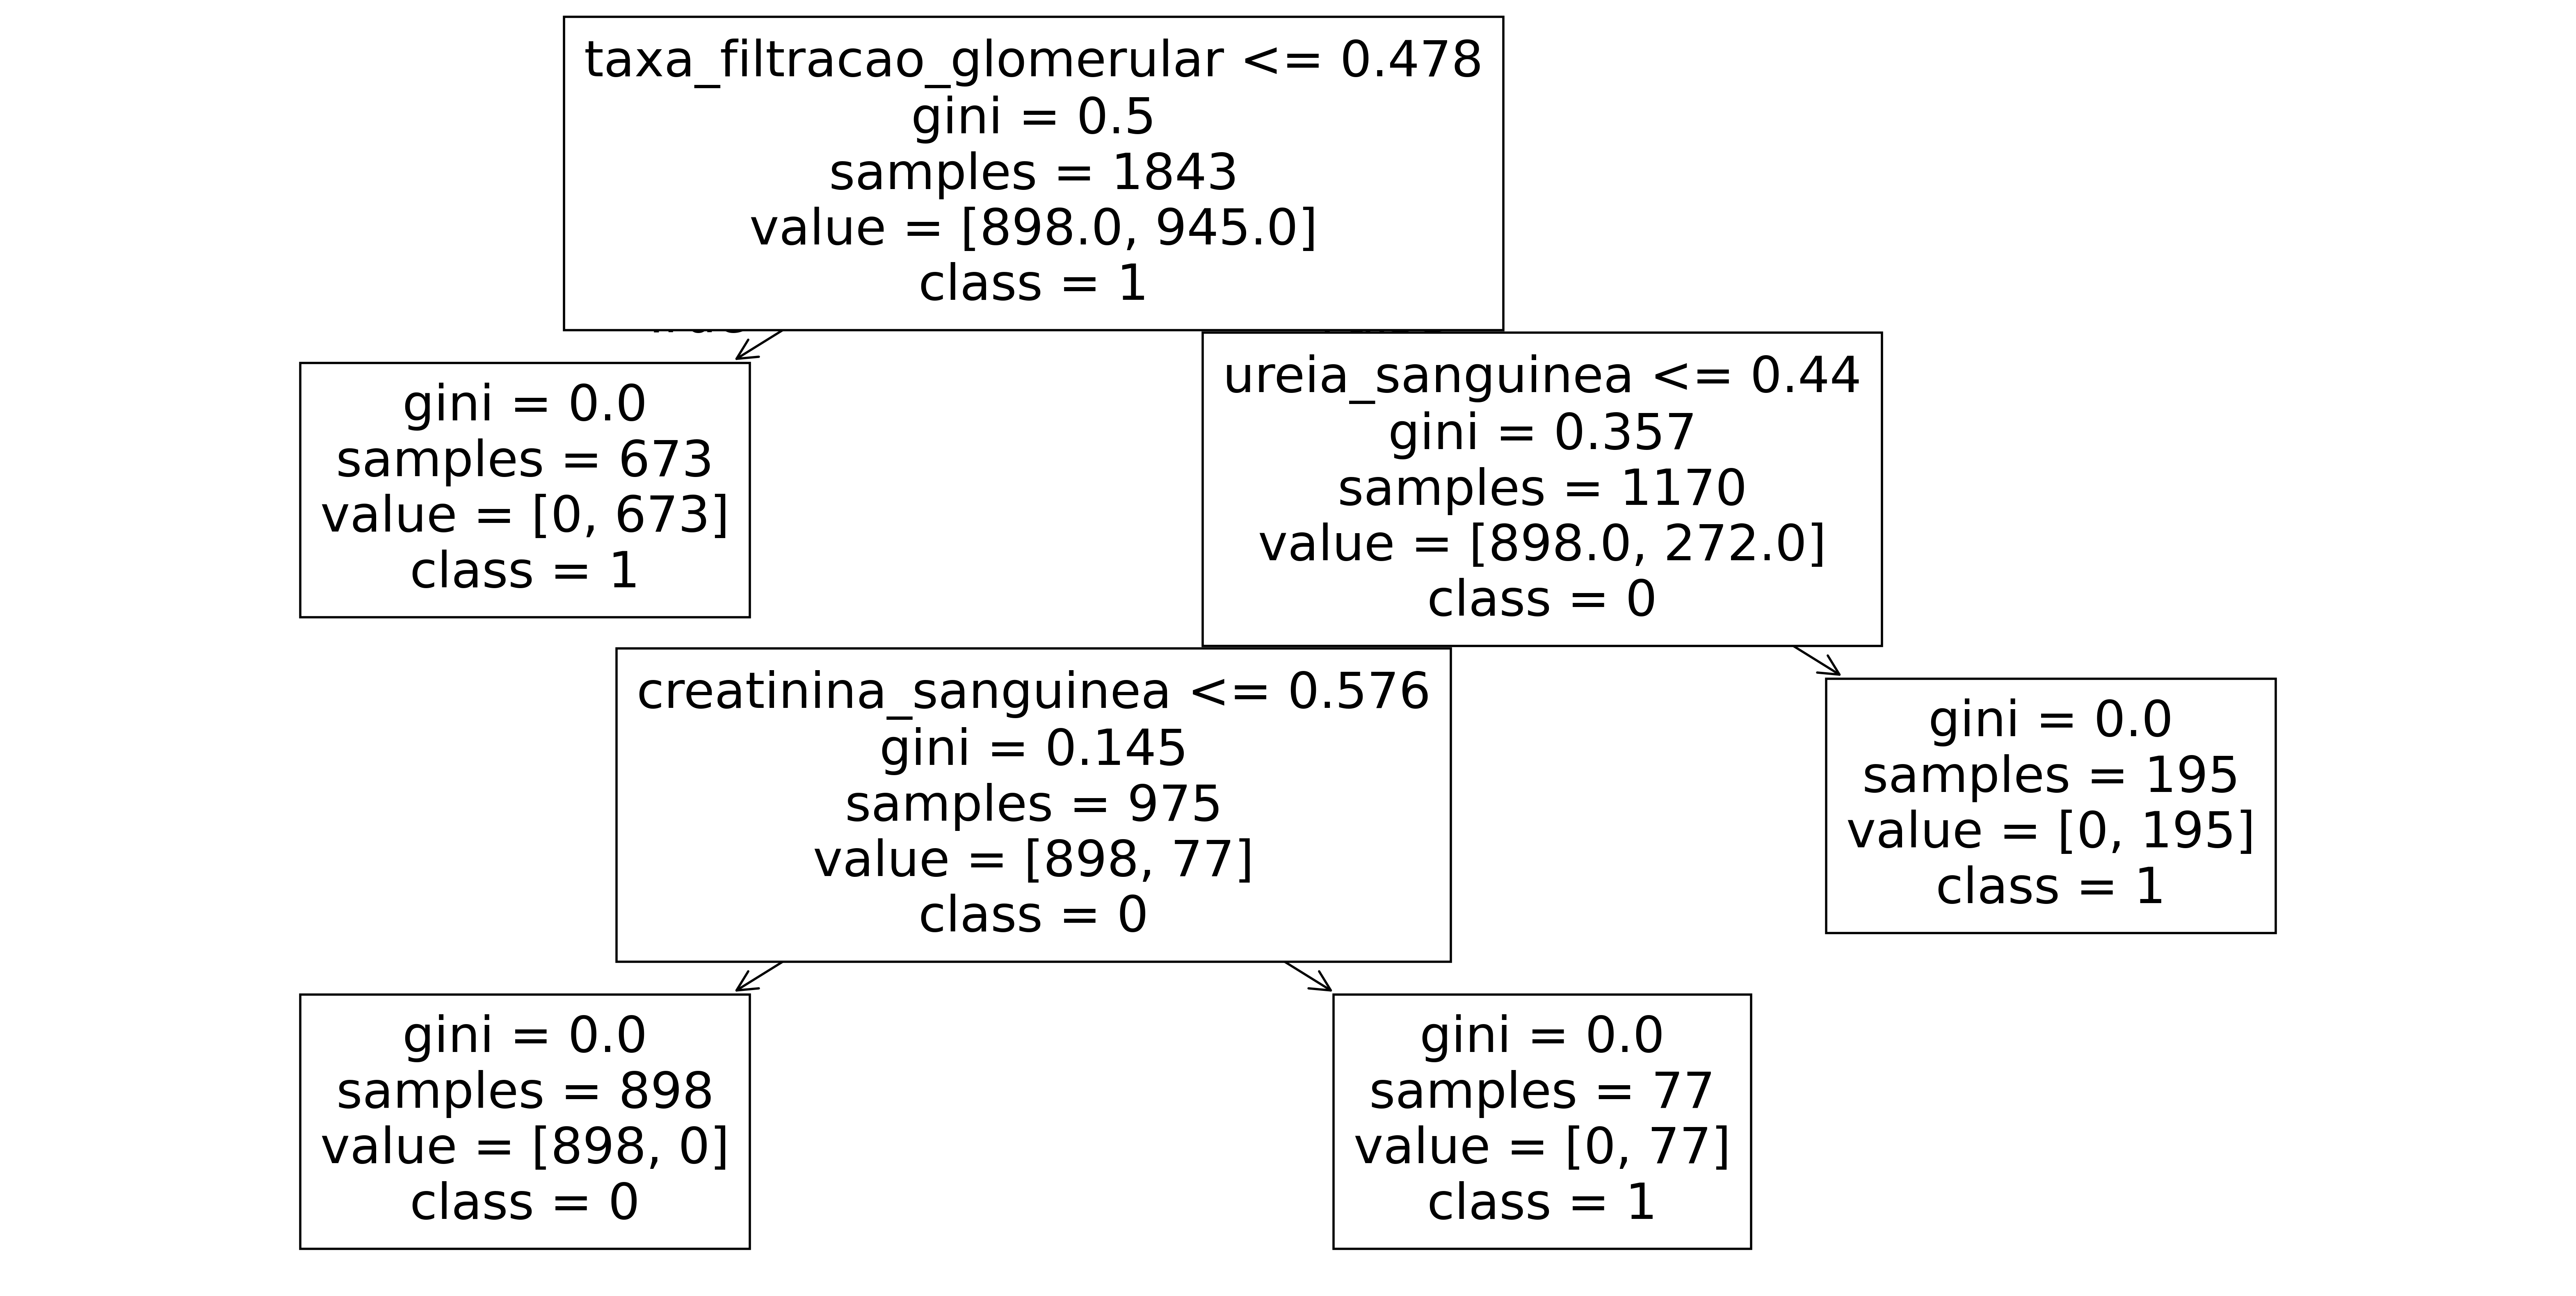

In [275]:
plt.figure(figsize=(20, 10), dpi=400)
plot_tree(decision_tree_model,
          feature_names = X.columns,
          class_names=decision_tree_model.classes_.astype(str))
plt.show()

Text(0, 0.5, 'Recall')

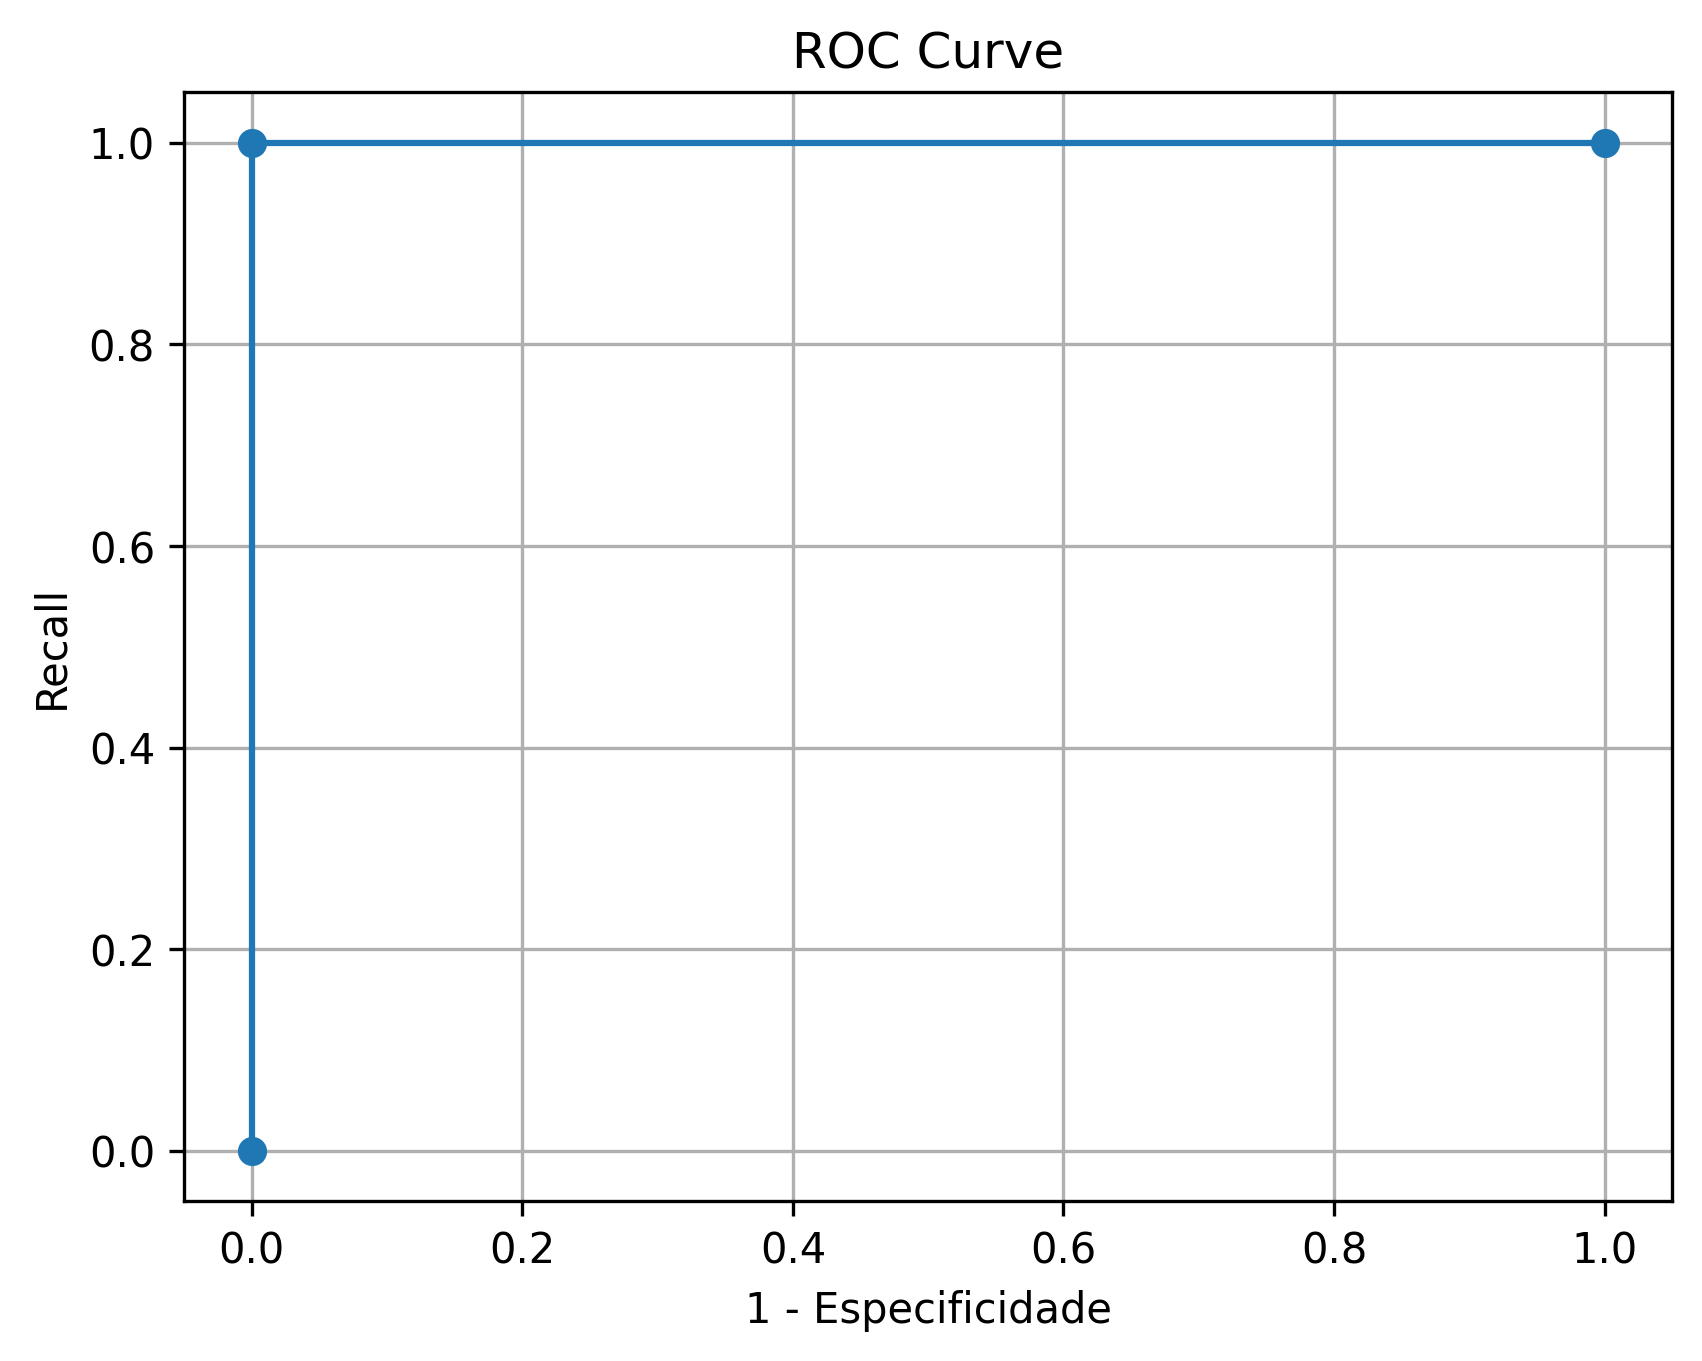

In [276]:
plt.figure(dpi=300)
plt.plot(roc_tree[0], roc_tree[1], 'o-')
plt.grid(True)
plt.title('ROC Curve')
plt.xlabel('1 - Especificidade')
plt.ylabel('Recall')

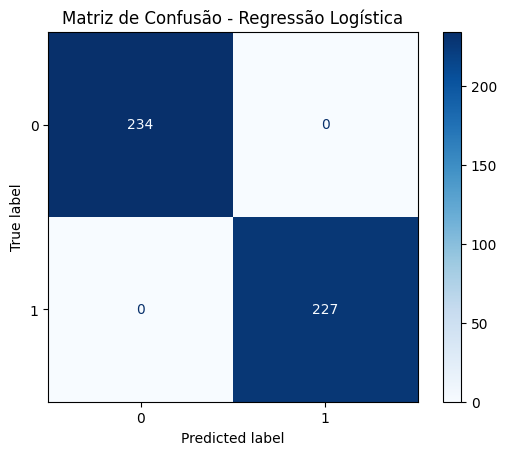

In [277]:
# Matriz de confusão
cm = metrics.confusion_matrix(y_test, y_pred_tree)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d') 

plt.title("Matriz de Confusão - Regressão Logística")
plt.grid(False)
plt.show()


### Decisão de Seleção do Modelo

Ao comparar os modelos aplicados, o **Logistic Regression** apresentou resultados mais realistas e consistentes. Suas métricas foram:

- **Acurácia**: 84,16%  
- **Precisão**: 83,19%  
- **Recall**: 85,02%

Esses valores indicam uma boa capacidade de generalização do modelo, com equilíbrio entre acertos nas classes positivas e negativas. A **curva ROC** também demonstrou uma boa separação entre as classes, reforçando a eficácia do modelo.

Por outro lado, o modelo de **Árvore de Decisão**, apesar de ter apresentado uma acurácia média próxima de **100%** nos folds da **validação cruzada**, mostrou sinais evidentes de **overfitting**, aprendendo demais os dados de treino e generalizando mal para novos dados. Isso ficou evidente tanto na complexidade da árvore (com apenas 3 divisões) quanto nos resultados inflados do cross-validation.

> **Conclusão**: O modelo de **Regressão Logística** foi selecionado como o mais adequado, por apresentar desempenho consistente, boa generalização e métricas realistas frente aos dados analisados.


### **Save The Model**

In [278]:
joblib.dump(model, '../models/model_patient_renal.pkl')

['../models/model_patient_renal.pkl']